3) Video Segmentation. (Use Dataset B)
A colour histogram h(.) can be generated by counting how many times each colour occurs in an image.
Histogram intersection can be used to match a pair of histograms. Given a pair of histograms, e.g., of an
input image I and a model M, each containing n bins, the intersection of the histograms is defined as
∑n j=1 min[h(Ij), h(Mj)].
a) Write a histogram function that returns the colour histogram of an input image. Visualize the histogram
and save the corresponding figure. For a given video sequence, use the above function to construct
the histogram of each frame.

In [1]:
!pip install imageio[ffmpeg]
!pip install imageio[pyav]
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time

# function that returns the colour histogram of an input image.
def ICV_calculate_color_histogram(image):
    # separates the image into its three color channels (R, G, B) 
    r, g, b = image.split()

    # initialize arrays to store histograms for each R G B
    hist_r = [0] * 256
    hist_g = [0] * 256
    hist_b = [0] * 256

    # Calculate the histograms for each channel R G B, :
    #counts the occurrences of each pixel value in each channel to construct the histograms.
    for channel, histogram in zip([r, g, b], [hist_r, hist_g, hist_b]):
        for pixel_value in channel.getdata():
            histogram[pixel_value] += 1

    return hist_r, hist_g, hist_b
    
# function to visualize the histogram and save
def ICV_plot_color_histogram(hist_r, hist_g, hist_b,frame_num=-1):
    
    # using epoch time to uniquely identify each image while saving
    #epoch_time = int(time.time() * 1000)

    # Create a filename with a dynamic prefix
    filename = f"q3_frame_{frame_num}_color_histogram.jpg"
    plt.figure()

    # plot the color histograms
    plt.plot(hist_r, color='red', label='Red')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_b, color='blue', label='Blue')

    plt.xlabel('Intensity Value')
    plt.ylabel('Count')
    plt.title(f'Color Histogram Frame {frame_num}')
    plt.legend()
    plt.savefig(filename)
    
    plt.show()

# testing 
#image_path = 'face-3.jpg'
#hist_r, hist_g, hist_b = ICV_calculate_color_histogram(Image.open(image_path))
#ICV_plot_color_histogram(hist_r, hist_g, hist_b)


a) For a given video sequence, use the above function to construct
the histogram of each frame.

Number of frames in the video: 348


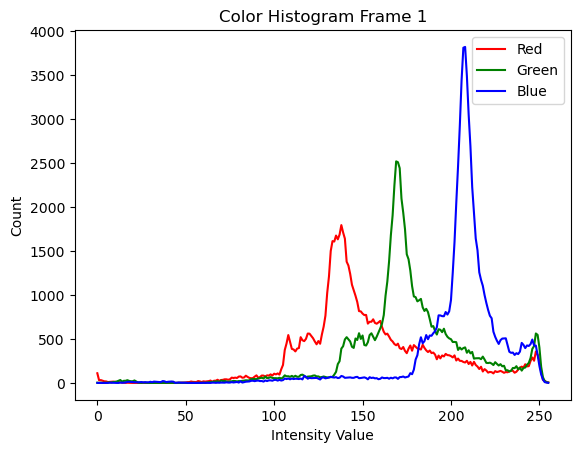

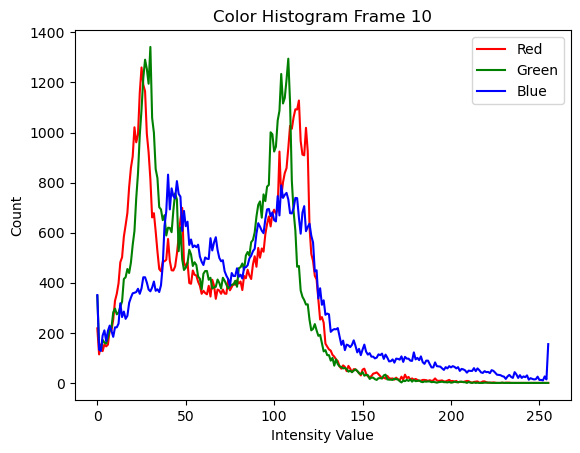

In [2]:
import imageio
from PIL import Image
import time

# load the video DatasetB.avi
video_path = 'DatasetB.avi'
video = imageio.get_reader(video_path)

# the number of frames in the video using count_frames
frame_length = imageio.get_reader(video_path).count_frames()
print(f"Number of frames in the video: {frame_length}")

# getting frame 1 from video
frame_number=1
frame1 = video.get_data(frame_number)
frame_image = Image.fromarray(frame1)
frame_image_path = 'q3_frame'+str(frame_number)+'.jpg'
frame_image.save(frame_image_path)
#calculate histogram and plot for the frame 1
hist_r, hist_g, hist_b = ICV_calculate_color_histogram(Image.fromarray(frame1))
ICV_plot_color_histogram(hist_r, hist_g, hist_b,frame_number)

# getting frame 10 from video
frame_number=10
frame10 = video.get_data(frame_number)
frame_image = Image.fromarray(frame10)
frame_image_path = 'q3_frame'+str(frame_number)+'.jpg'
frame_image.save(frame_image_path)
#calculate histogram for the frame 10
hist_r, hist_g, hist_b = ICV_calculate_color_histogram(Image.fromarray(frame10))
ICV_plot_color_histogram(hist_r, hist_g, hist_b,frame_number)


#the commented code will iterate through all frames in the video compute histogram and plot it, 
# Commented because there are 348 frames in video which will be huge .Since Report template asks for only two non consecutive frammes, 

'''
# Iterate through frames and process each frame
for frame_number, frame in enumerate(video):
    frame_image = Image.fromarray(frame)
    frame_image_path = 'frame'+str(frame_number)+'.jpg'
    frame_image.save(frame_image_path)
    hist_r, hist_g, hist_b = ICV_calculate_color_histogram(Image.fromarray(frame))
    ICV_plot_color_histogram(hist_r, hist_g, hist_b,frame_number)    
    if frame_number == 10:# this is just to avoid iterating over all frames , can be deleted if we want to run for all
        break;
'''
# close the video reader
video.close()


b) Write a function that returns the value of the intersection of a pair of histograms.

In [3]:
def ICV_histogram_intersection(hist1, hist2,isNormalized=False):
    #  histograms should  have the same length
    assert len(hist1) == len(hist2), "Histograms must of the same length"

    # Compute the intersection using the formula: ∑ min[hist1[i], hist2[i]]
    intersection = sum(min(hist1[i], hist2[i]) for i in range(len(hist1)))
    
    if isNormalized ==True:
        # Normalize the intersection by dividing by the sum of histogram bins
        normalization_factor = sum(hist1) if sum(hist1) < sum(hist2) else sum(hist2)
        intersection=intersection/normalization_factor

    return intersection

b)For a given video
sequence, use the histogram intersection function to calculate the intersection between consecutive
frames (e.g. between It and It+1, between It+1 and It+2 and so on). 

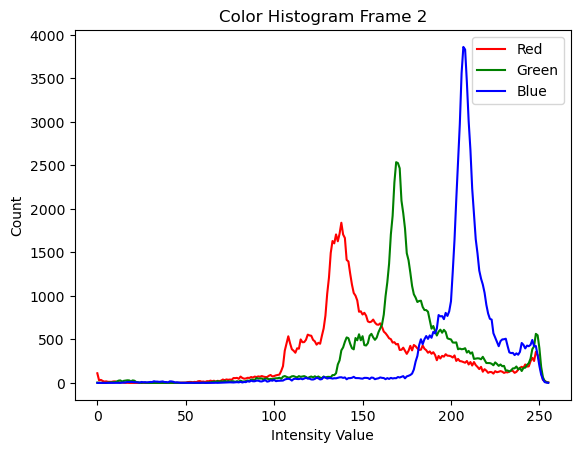

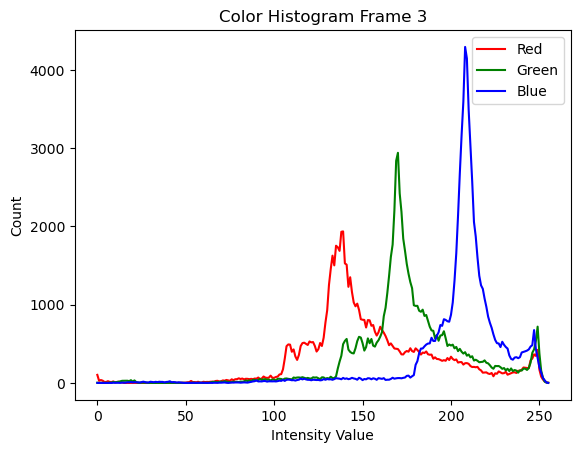

Intersection between frame 2 and frame 3:
Red Channel: 72522
Green Channel: 72626
Blue Channel: 71044


In [4]:
# call to check intersection for two consecutive frames 
video_path = 'DatasetB.avi'
video = imageio.get_reader(video_path)

# getting frame number 2 from video
frame_number=2
frame2 = video.get_data(frame_number)
frame_image = Image.fromarray(frame2)
frame_image_path = 'q3_frame'+str(frame_number)+'.jpg'
frame_image.save(frame_image_path)
prev_hist_r, prev_hist_g, prev_hist_b = ICV_calculate_color_histogram(Image.fromarray(frame2))
ICV_plot_color_histogram(prev_hist_r, prev_hist_g, prev_hist_b,frame_number)

# getting frame number 3 from video
frame_number=3
frame3 = video.get_data(frame_number)
frame_image = Image.fromarray(frame3)
frame_image_path = 'q3_frame'+str(frame_number)+'.jpg'
frame_image.save(frame_image_path)
hist_r, hist_g, hist_b = ICV_calculate_color_histogram(Image.fromarray(frame3))
ICV_plot_color_histogram(hist_r, hist_g, hist_b,frame_number)



# Calculate  intersection between consecutive frames not normalized
intersection_red = ICV_histogram_intersection(prev_hist_r, hist_r)
intersection_green = ICV_histogram_intersection(prev_hist_g, hist_g)
intersection_blue = ICV_histogram_intersection(prev_hist_b, hist_b)

# Output or use the intersection values
print(f"Intersection between frame 2 and frame 3:")
print(f"Red Channel: {intersection_red}")
print(f"Green Channel: {intersection_green}")
print(f"Blue Channel: {intersection_blue}")


b)Plot the intersection values over time and the normalised
intersection values, and save the corresponding figures. Show and comment the figures in the report.

Number of frames in the video: 348


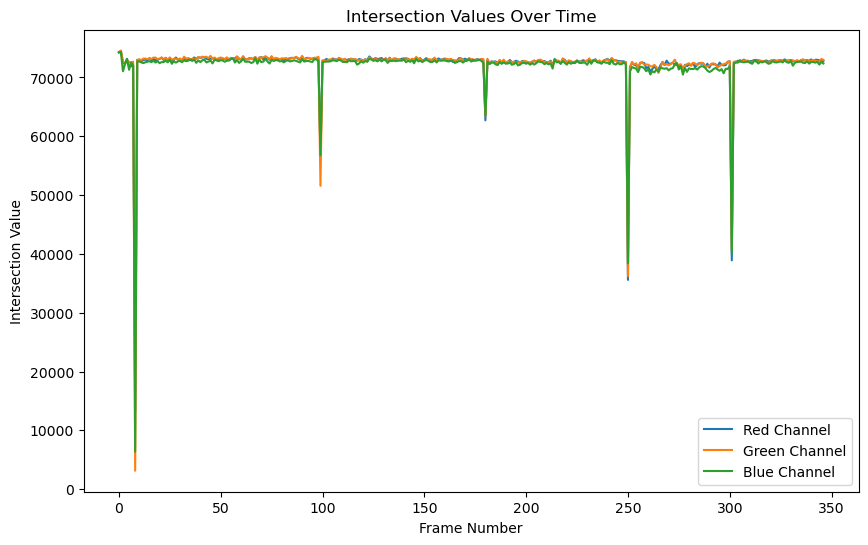

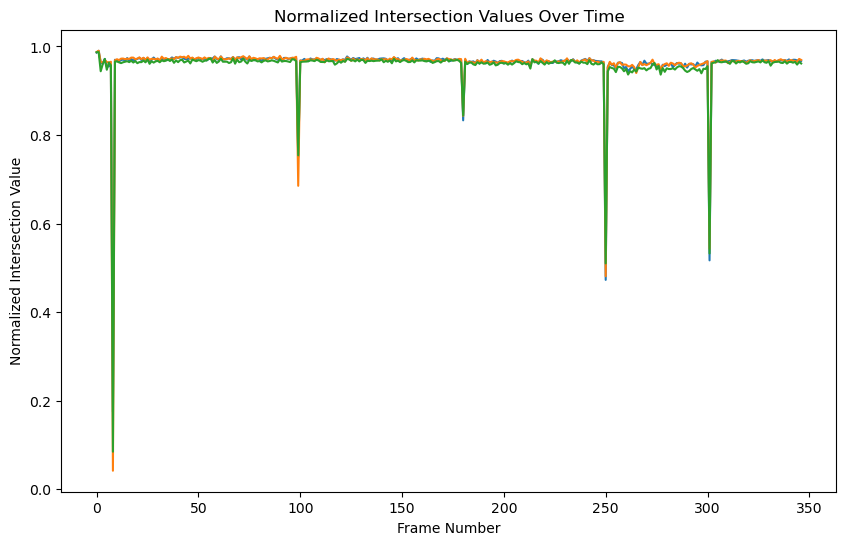

In [5]:
# load the video
video_path = 'DatasetB.avi'
video = imageio.get_reader(video_path)

# the number of frames in the video using count_frames
frame_length = imageio.get_reader(video_path).count_frames()
print(f"Number of frames in the video: {frame_length}")

#  lists to store intersection values and normalized intersection values
intersection_values = []
normalized_intersection_values = []

frame_number=0
frame0 = video.get_data(frame_number)

# set frame0 histogram as previous histogram
prev_hist_red, prev_hist_green, prev_hist_blue = ICV_calculate_color_histogram(Image.fromarray(frame0))

# iterate through frames 1 till last frame and process each frame
for frame_number in range(1,frame_length ):
    #  the current frame
    frame = video.get_data(frame_number)

    # compute histogram for the current frame
    hist_red, hist_green, hist_blue = ICV_calculate_color_histogram(Image.fromarray(frame))

    # calculate  intersection between current and previous  frames
    intersection_red = ICV_histogram_intersection(prev_hist_red, hist_red)
    intersection_green = ICV_histogram_intersection(prev_hist_green, hist_green)
    intersection_blue = ICV_histogram_intersection(prev_hist_blue, hist_blue)
    ''' 
    print(f"Intersection between frame {frame_number-1} and frame {frame_number}:")
    print(f"Red Channel: {intersection_red}")
    print(f"Green Channel: {intersection_green}")
    print(f"Blue Channel: {intersection_blue}")
    ''' 
    # calculate normalized intersection between current and previous  frames
    normalized_intersection_red = ICV_histogram_intersection(prev_hist_red, hist_red,True)
    normalized_intersection_green = ICV_histogram_intersection(prev_hist_green, hist_green,True)
    normalized_intersection_blue = ICV_histogram_intersection(prev_hist_blue, hist_blue,True)
    '''
    # Output for use the normalized intersection values
    print(f"Normalized Intersection between frame {frame_number-1} and frame {frame_number}:")
    print(f"Red Channel: {normalized_intersection_red}")
    print(f"Green Channel: {normalized_intersection_green}")
    print(f"Blue Channel: {normalized_intersection_blue}")
    '''
    # append values to the lists
    intersection_values.append([intersection_red, intersection_green, intersection_blue])
    normalized_intersection_values.append([normalized_intersection_red, normalized_intersection_green, normalized_intersection_blue])

    # update previous histogram for the next iteration
    prev_hist_red, prev_hist_green, prev_hist_blue = hist_red, hist_green, hist_blue

# Plot intersection values over time
plt.figure(figsize=(10, 6))
plt.plot(intersection_values)
plt.title('Intersection Values Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Intersection Value')
plt.legend(['Red Channel', 'Green Channel', 'Blue Channel'])
plt.savefig('intersection_values_over_time.png')
plt.show()

# Plot normalized intersection values over time
plt.figure(figsize=(10, 6))
plt.plot(normalized_intersection_values)
plt.title('Normalized Intersection Values Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Normalized Intersection Value')
plt.savefig('normalized_intersection_values_over_time.png')
plt.show()

# close the video reader
video.close()
